In [180]:
import ast
from operator import itemgetter
import matplotlib.pyplot as plt
import ast


In [316]:
import pandas as pd
import json
# Calculate old and new ms_per_timebin
old_ms_per_timebin = (512 / 44100) * 1000  # Assuming old hop_length was 512
new_ms_per_timebin = (119 / 44100) * 1000
def convert_time(old_time, old_ms_per_timebin, new_ms_per_timebin):
    old_frame = old_time / old_ms_per_timebin
    new_time = old_frame * new_ms_per_timebin
    return new_time
def convert_onsets_offsets(onsets_offsets):
    return {k: [[convert_time(onset, old_ms_per_timebin, new_ms_per_timebin),
                 convert_time(offset, old_ms_per_timebin, new_ms_per_timebin)]
                for onset, offset in v]
            for k, v in onsets_offsets.items()}
# Load the database
db = pd.read_csv("database.csv")
# Convert 'syllable_onsets/offsets' column from JSON strings to Python objects and apply the conversion
db['syllable_onsets/offsets'] = db['syllable_onsets/offsets'].apply(json.loads).apply(convert_onsets_offsets)
# Function to convert onsets/offsets to seconds
def convert_to_seconds(onsets_offsets):
    return {k: [[onset/1000, offset/1000] for onset, offset in v]
             for k, v in onsets_offsets.items()}
# Convert to seconds
db['syllable_onsets/offsets'] = db['syllable_onsets/offsets'].apply(convert_to_seconds)
# Extract date and time information from file_name
db['datetime'] = db['file_name'].str.extract(r'(\d+_\d+_\d+_\d+_\d+)\.wav$')
db[['month', 'day', 'hour', 'minute', 'second']] = db['datetime'].str.split('_', expand=True).astype(int)
# Display the first few rows and data info
print(db.head())
print(db.info())
# Print a sample of the converted syllable_onsets/offsets for verification
print("\nSample of converted syllable_onsets/offsets:")
print(db['syllable_onsets/offsets'].iloc[0])
# Filter the database for a specific day (e.g., April 9th)
specific_day = (db['month'] == 4) & (db['day'] > 20)  
db_april_9th = db[specific_day]
# Display the first few rows and data info for the specific day
print("\nData for April 9th:")
print(db_april_9th.head())
print(db_april_9th.info())
# Print a sample of the converted syllable_onsets/offsets for verification
print("\nSample of converted syllable_onsets/o6fsets for April 9th:")
print(db_april_9th['syllable_onsets/offsets'].iloc[0])
# Save the syllable onset/offset to a txt file called temp
#with open('temp.txt', 'w') as f:
#    f.write(str(db['syllable_onsets/offsets'].iloc[35812]))

                                           file_name  song_present  \
0  /media/rose/Extreme SSD/20240726_All_Area_X_Le...          True   
1  /media/rose/Extreme SSD/20240726_All_Area_X_Le...          True   
2  /media/rose/Extreme SSD/20240726_All_Area_X_Le...          True   
3  /media/rose/Extreme SSD/20240726_All_Area_X_Le...          True   
4  /media/rose/Extreme SSD/20240726_All_Area_X_Le...          True   

                             syllable_onsets/offsets    datetime  month  day  \
0  {'8': [[2.55, 2.558095238095238], [2.574285714...  3_4_9_0_28      3    4   
1  {'9': [[3.356825396825397, 3.3595238095238096]...  3_4_9_0_38      3    4   
2  {'9': [[1.1171428571428574, 1.1198412698412699...   3_4_9_1_1      3    4   
3  {'8': [[4.61968253968254, 4.630476190476191], ...  3_4_9_1_30      3    4   
4  {'11': [[1.0847619047619048, 1.087460317460317...  3_4_9_1_48      3    4   

   hour  minute  second  
0     9       0      28  
1     9       0      38  
2     9       1     

<Axes: xlabel='hour'>

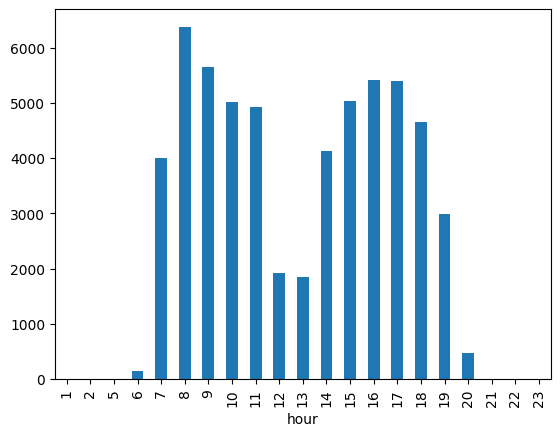

In [311]:
db['hour'].value_counts().sort_index().plot(kind='bar')

In [306]:
specific_day = (db['month'] == 4) & (db['hour'] == 6)

In [280]:
specific_day
db_april_9th = db[specific_day]

In [281]:
db_april_9th.head()

,file_name,song_present,syllable_onsets/offsets,datetime,month,day,hour,minute,second
38683,/media/rose/Extreme SSD/20240726_All_Area_X_Le...,False,{},4_12_6_39_38,4,12,6,39,38
38684,/media/rose/Extreme SSD/20240726_All_Area_X_Le...,False,{},4_12_6_40_13,4,12,6,40,13
49253,/media/rose/Extreme SSD/20240726_All_Area_X_Le...,False,{},4_18_6_58_0,4,18,6,58,0
49254,/media/rose/Extreme SSD/20240726_All_Area_X_Le...,True,"{'8': [[1.0793650793650795, 1.1198412698412699...",4_18_6_58_17,4,18,6,58,17
49255,/media/rose/Extreme SSD/20240726_All_Area_X_Le...,True,"{'19': [[1.1522222222222225, 1.154920634920635...",4_18_6_58_22,4,18,6,58,22


In [317]:

data=db_april_9th['syllable_onsets/offsets'].iloc[1]
all_intervals = []
for syllable, intervals in data.items():
    for interval in intervals:
        all_intervals.append((interval[0], interval[1], syllable))
sorted_intervals = sorted(all_intervals, key=itemgetter(0))

# Extract the third item from each tuple and create a NumPy array
syllables = np.array([item[2] for item in sorted_intervals])
# Convert the array of strings to an array of integers
npsyl = syllables.astype(int)


In [318]:
import numpy as np
from operator import itemgetter

# Initialize an empty list to store all syllables from all rows
all_syllables = []

# Loop over all rows in the DataFrame
for i in range(len(db_april_9th)):
    # Extract data from the current row
    data = db_april_9th['syllable_onsets/offsets'].iloc[i]
    
    # Process the data for this row (similar to your original code)
    all_intervals = []
    for syllable, intervals in data.items():
        for interval in intervals:
            all_intervals.append((interval[0], interval[1], syllable))
    
    sorted_intervals = sorted(all_intervals, key=itemgetter(0))
    
    # Extract syllables and convert to integers
    syllables = np.array([item[2] for item in sorted_intervals])
    npsyl = syllables.astype(int)
    
    # Append the syllables from this row to the master list
    all_syllables.extend(npsyl)

# Convert the master list to a NumPy array if needed
all_syllables_array = np.array(all_syllables)

print(f"Total number of syllables: {len(all_syllables_array)}")
print(f"First few syllables: {all_syllables_array[:10]}")

Total number of syllables: 327443
First few syllables: [13 19 32 32 33 33 19 32 33 32]


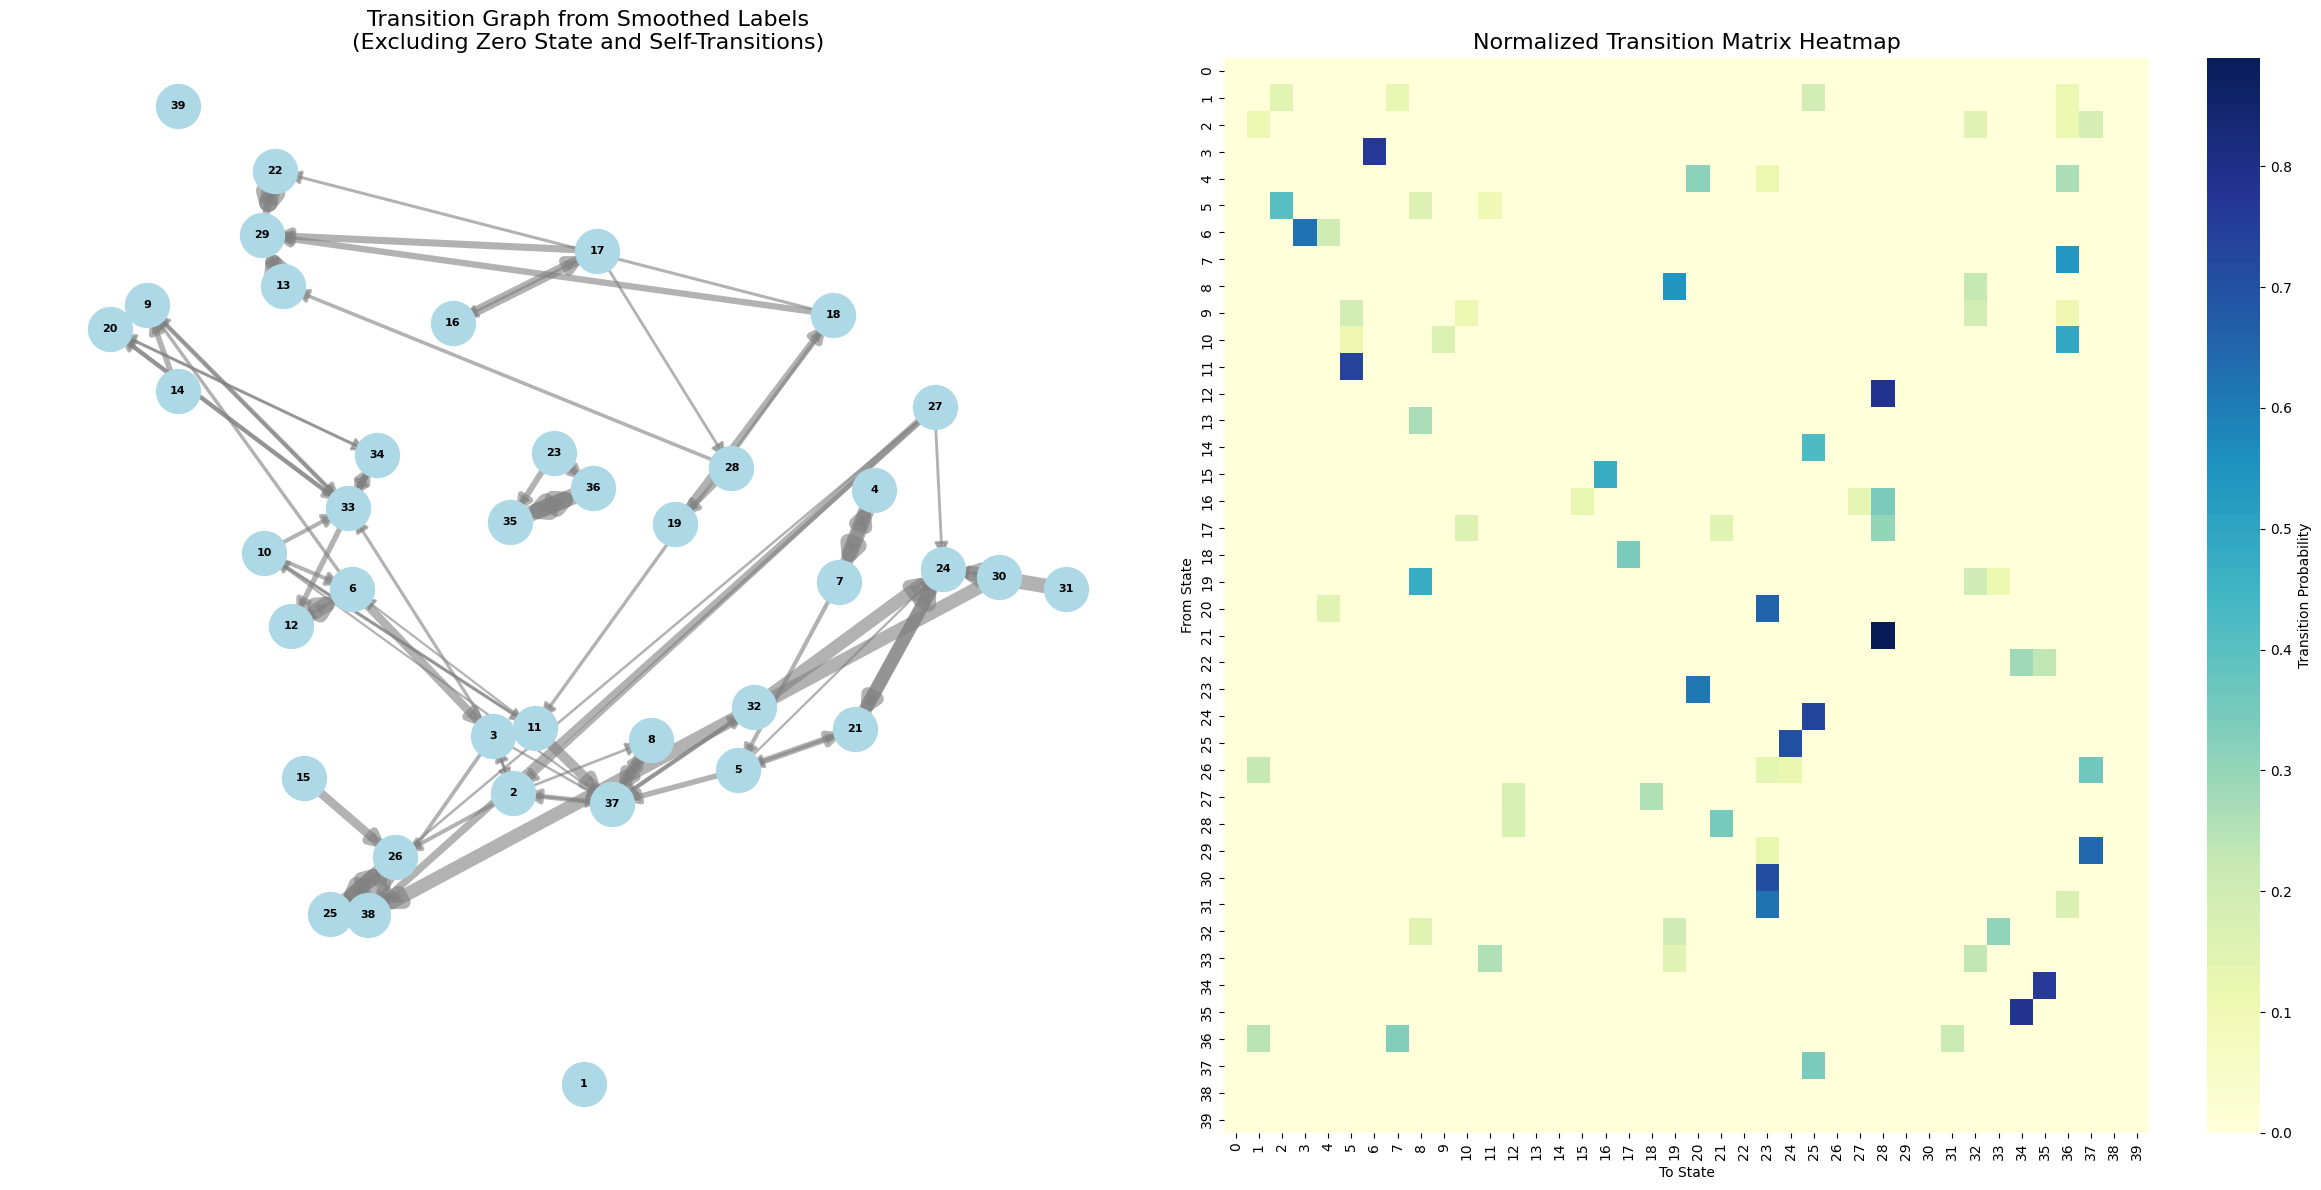

Number of unique labels (excluding zero state): 40

Top 5 most common transitions (excluding zero state and self-transitions):
From 25 to 24: 2544 times
From 24 to 25: 2086 times
From 8 to 19: 2048 times
From 34 to 35: 1966 times
From 35 to 34: 1959 times

Transition matrix (excluding zero state and self-transitions):
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 250. ...  13.   0.   0.]
 [  0. 235.   0. ... 399.   0.   0.]
 ...
 [  0.  48.  24. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]

Normalized transition matrix (excluding zero state and self-transitions):
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.1450116  ... 0.         0.         0.        ]
 [0.         0.10884669 0.         ... 0.18480778 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.   

In [319]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter
import seaborn as sns


smoothed_labels=all_syllables_array
unique_labels=np.arange(1, 40)

# Assuming smoothed_labels is already defined from the previous script
# If not, you need to load and process it first

# Remove state 0 from unique labels
#unique_labels = np.unique(smoothed_labels)
#unique_labels = unique_labels[unique_labels != 0]
#n_labels = len(unique_labels)
n_labels=40;

# Build transition matrix
transition_matrix = np.zeros((n_labels, n_labels))

for i in range(len(smoothed_labels) - 1):
    if smoothed_labels[i] != 0 and smoothed_labels[i+1] != 0:
        #from_state = np.where(unique_labels == smoothed_labels[i])[0][0]
        #to_state = np.where(unique_labels == smoothed_labels[i+1])[0][0]
        if smoothed_labels[i] != smoothed_labels[i+1]:  # Exclude self-transitions
            transition_matrix[smoothed_labels[i], smoothed_labels[i+1]] += 1

# Normalize transition matrix
row_sums = transition_matrix.sum(axis=1)
row_sums[row_sums == 0] = 1  # Avoid division by zero
transition_matrix_norm = transition_matrix / row_sums[:, np.newaxis]
transition_matrix_norm[transition_matrix_norm < 0.1] = 0

# Create graph
G = nx.DiGraph()

# Add nodes
for label in unique_labels:
    G.add_node(label)

# Add edges (excluding self-edges)
for i, from_label in enumerate(unique_labels):
    for j, to_label in enumerate(unique_labels):
        if i != j:  # Exclude self-edges
            weight = transition_matrix_norm[i, j]
            if weight > 0:
                G.add_edge(from_label, to_label, weight=weight)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))

# Plot graph
#pos = nx.spring_layout(G, k=0.2, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue', ax=ax1)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold', ax=ax1)
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
nx.draw_networkx_edges(G, pos, width=[w * 15 for w in weights], edge_color='gray',
                       arrows=True, arrowsize=20, alpha=0.6, ax=ax1)
ax1.set_title("Transition Graph from Smoothed Labels\n(Excluding Zero State and Self-Transitions)", fontsize=16)
ax1.axis('off')

# Plot transition matrix as heatmap without numbers
sns.heatmap(transition_matrix_norm, cmap='YlGnBu', ax=ax2, cbar_kws={'label': 'Transition Probability'})
ax2.set_title("Normalized Transition Matrix Heatmap", fontsize=16)
ax2.set_xlabel("To State")
ax2.set_ylabel("From State")
#ax2.set_xticklabels(unique_labels)
#ax2.set_yticklabels(unique_labels)

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Number of unique labels (excluding zero state): {n_labels}")
print("\nTop 5 most common transitions (excluding zero state and self-transitions):")
transitions = [(smoothed_labels[i], smoothed_labels[i+1]) for i in range(len(smoothed_labels)-1)
               if smoothed_labels[i] != 0 and smoothed_labels[i+1] != 0 and smoothed_labels[i] != smoothed_labels[i+1]]
for transition, count in Counter(transitions).most_common(5):
    print(f"From {transition[0]} to {transition[1]}: {count} times")

print("\nTransition matrix (excluding zero state and self-transitions):")
print(transition_matrix)

print("\nNormalized transition matrix (excluding zero state and self-transitions):")
print(transition_matrix_norm)

# Calculate and print the percentage of data points that were zero
zero_percentage = (smoothed_labels == 0).mean() * 100
print(f"\nPercentage of data points classified as zero: {zero_percentage:.2f}%")

DEBUG: all_syllables_array shape: (68555,)
DEBUG: all_syllables_array dtype: int64
DEBUG: Sample of all_syllables_array: [ 8 16 16 34 15 37 16  5  5  5  5  5  5  5  5  5  5  5  5  5]
DEBUG: Unique syllables: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37]
DEBUG: Counts: [1997 8702 2644 9290 4588 1118 2968 2148 1265 4629  494  410  447   51
  215  213   45  239 5174  976  349 2999 1185 1574  602   68  141  711
   30   51  568 1483 5997  881 1031 2732  540]
DEBUG: Processing syllable 1
DEBUG: Array for syllable 1: [ 8 16 16 ... 34 35 34]
DEBUG: Entering count_consecutive_repeats with array of shape (1997,)
DEBUG: Change indices: [   0    2    3    4    5    6   41   42   43   44   45   46   50   51
   53   55   56   57   59   66   69   74   76   82   83   88   90   97
  101  102  104  106  108  110  112  116  117  119  122  124  130  131
  135  136  139  140  143  144  146  147  150  152  154  155  156  158
  159  164  167

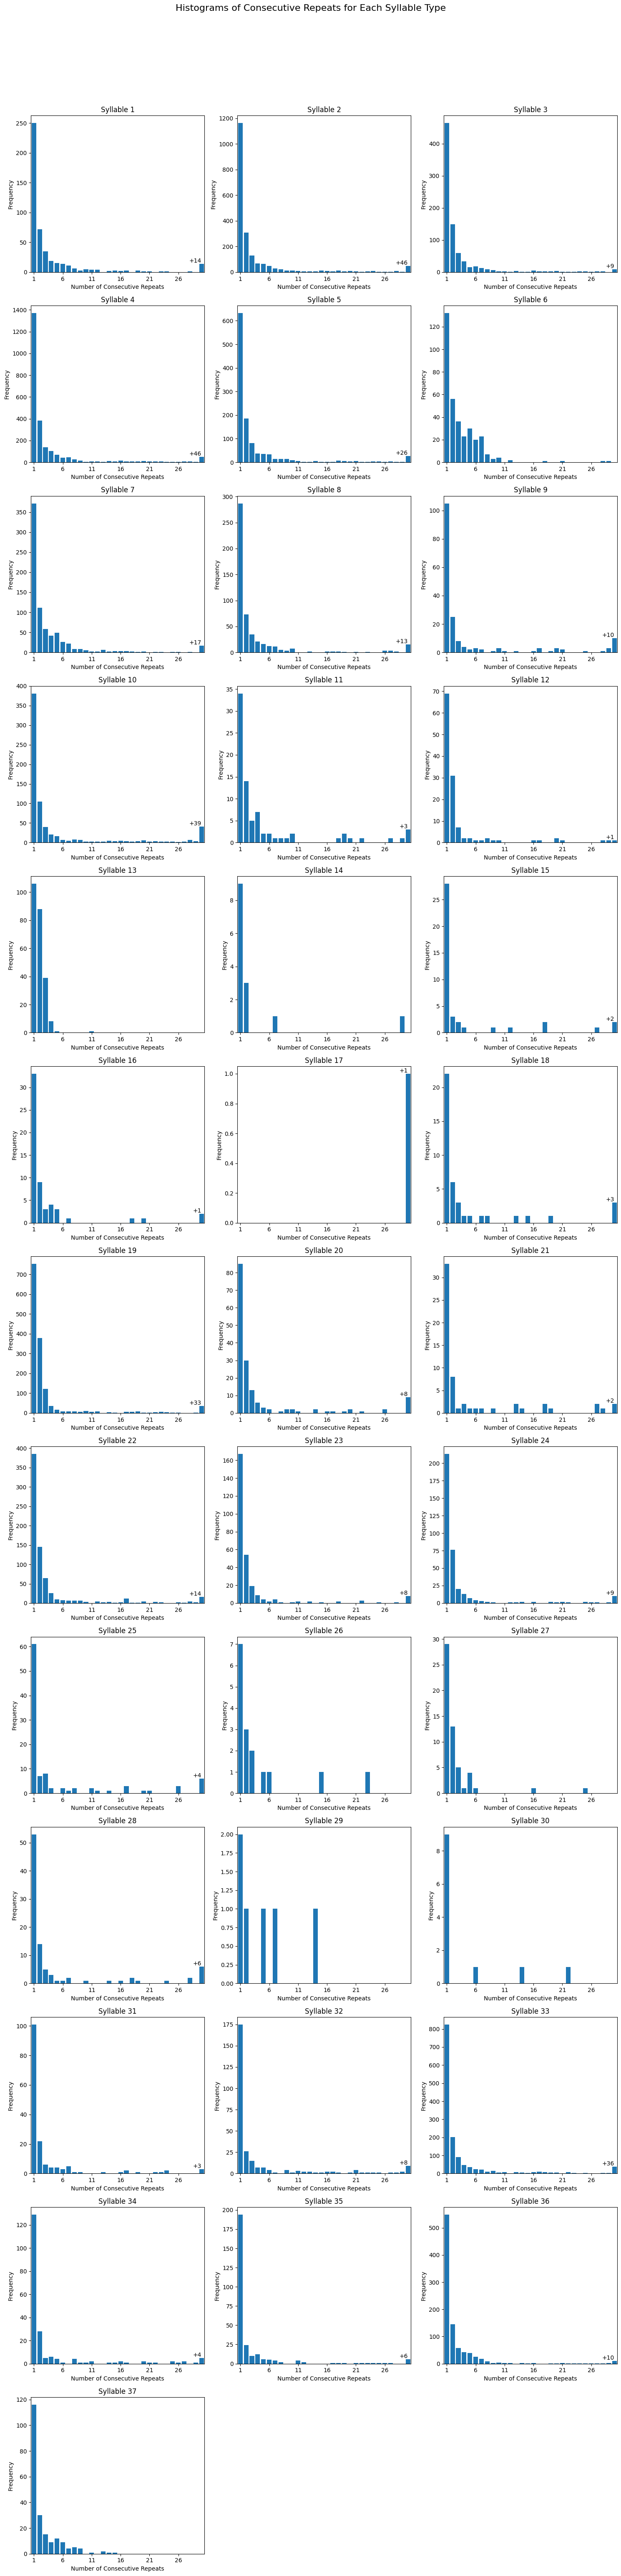


Syllable 1:
  Max consecutive repeats: 61
  Average consecutive repeats: 4.25
  Most common number of repeats: 1
  Number of occurrences with more than 30 repeats: 14

Syllable 2:
  Max consecutive repeats: 168
  Average consecutive repeats: 4.28
  Most common number of repeats: 1
  Number of occurrences with more than 30 repeats: 46

Syllable 3:
  Max consecutive repeats: 79
  Average consecutive repeats: 3.24
  Most common number of repeats: 1
  Number of occurrences with more than 30 repeats: 9

Syllable 4:
  Max consecutive repeats: 131
  Average consecutive repeats: 3.90
  Most common number of repeats: 1
  Number of occurrences with more than 30 repeats: 46

Syllable 5:
  Max consecutive repeats: 89
  Average consecutive repeats: 4.02
  Most common number of repeats: 1
  Number of occurrences with more than 30 repeats: 26

Syllable 6:
  Max consecutive repeats: 29
  Average consecutive repeats: 3.29
  Most common number of repeats: 1
  Number of occurrences with more than 30 rep

In [271]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Debugging function
def debug_print(message):
    print(f"DEBUG: {message}")

debug_print(f"all_syllables_array shape: {all_syllables_array.shape}")
debug_print(f"all_syllables_array dtype: {all_syllables_array.dtype}")
debug_print(f"Sample of all_syllables_array: {all_syllables_array[:20]}")

def count_consecutive_repeats(arr):
    debug_print(f"Entering count_consecutive_repeats with array of shape {arr.shape}")
    if len(arr) == 0:
        debug_print("Empty array")
        return np.array([])
    if len(arr) == 1:
        debug_print("Single element array")
        return np.array([1])
    
    changes = np.diff(arr) != 0
    indices = np.where(changes)[0]
    debug_print(f"Change indices: {indices}")
    
    if len(indices) == 0:
        debug_print("No changes in array")
        return np.array([len(arr)])
    
    counts = np.diff(np.concatenate(([0], indices, [len(arr)])))
    debug_print(f"Counts: {counts}")
    return counts

# Count consecutive repeats for each syllable type
syllable_repeats = defaultdict(list)
unique_syllables, inverse_indices, counts = np.unique(all_syllables_array, return_inverse=True, return_counts=True)

debug_print(f"Unique syllables: {unique_syllables}")
debug_print(f"Counts: {counts}")

split_indices = np.cumsum(counts)[:-1]
syllable_arrays = np.split(all_syllables_array, split_indices)

for syllable, arr in zip(unique_syllables, syllable_arrays):
    debug_print(f"Processing syllable {syllable}")
    debug_print(f"Array for syllable {syllable}: {arr}")
    try:
        repeats = count_consecutive_repeats(arr)
        syllable_repeats[syllable] = repeats
        debug_print(f"Repeats for syllable {syllable}: {repeats}")
    except Exception as e:
        debug_print(f"Error processing syllable {syllable}: {str(e)}")

# Create histograms
n_syllables = len(unique_syllables)
n_cols = 3
n_rows = (n_syllables + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
fig.suptitle('Histograms of Consecutive Repeats for Each Syllable Type', fontsize=16)

max_repeat = 30  # Set maximum number of repeats to display

for idx, (syllable, repeats) in enumerate(syllable_repeats.items()):
    debug_print(f"Plotting histogram for syllable {syllable}")
    row = idx // n_cols
    col = idx % n_cols
    ax = axes[row, col] if n_rows > 1 else axes[col]
    
    # Count repeats up to max_repeat
    repeat_counts = np.bincount(np.clip(repeats, 1, max_repeat))
    if len(repeat_counts) < max_repeat + 1:
        repeat_counts = np.pad(repeat_counts, (0, max_repeat + 1 - len(repeat_counts)))
    
    # Plot histogram
    ax.bar(range(1, max_repeat + 1), repeat_counts[1:], align='center', width=0.8)
    ax.set_title(f'Syllable {syllable}')
    ax.set_xlabel('Number of Consecutive Repeats')
    ax.set_ylabel('Frequency')
    ax.set_xlim(0.5, max_repeat + 0.5)
    ax.set_xticks(range(1, max_repeat + 1, 5))  # Set x-ticks every 5 repeats
    ax.set_xticklabels(range(1, max_repeat + 1, 5))
    
    # Add text for the count of repeats > max_repeat
    if len(repeats) > 0 and max(repeats) > max_repeat:
        overflow_count = sum(r > max_repeat for r in repeats)
        ax.text(max_repeat, repeat_counts[max_repeat], f'+{overflow_count}', 
                ha='right', va='bottom')

debug_print("Finished plotting histograms")

# Remove empty subplots
for idx in range(len(syllable_repeats), n_rows * n_cols):
    row = idx // n_cols
    col = idx % n_cols
    fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Print some statistics
for syllable, repeats in syllable_repeats.items():
    print(f"\nSyllable {syllable}:")
    if len(repeats) > 0:
        print(f"  Max consecutive repeats: {max(repeats)}")
        print(f"  Average consecutive repeats: {np.mean(repeats):.2f}")
        print(f"  Most common number of repeats: {np.bincount(repeats).argmax()}")
        print(f"  Number of occurrences with more than {max_repeat} repeats: {sum(r > max_repeat for r in repeats)}")
    else:
        print("  No occurrences of this syllable")

debug_print("Script completed")

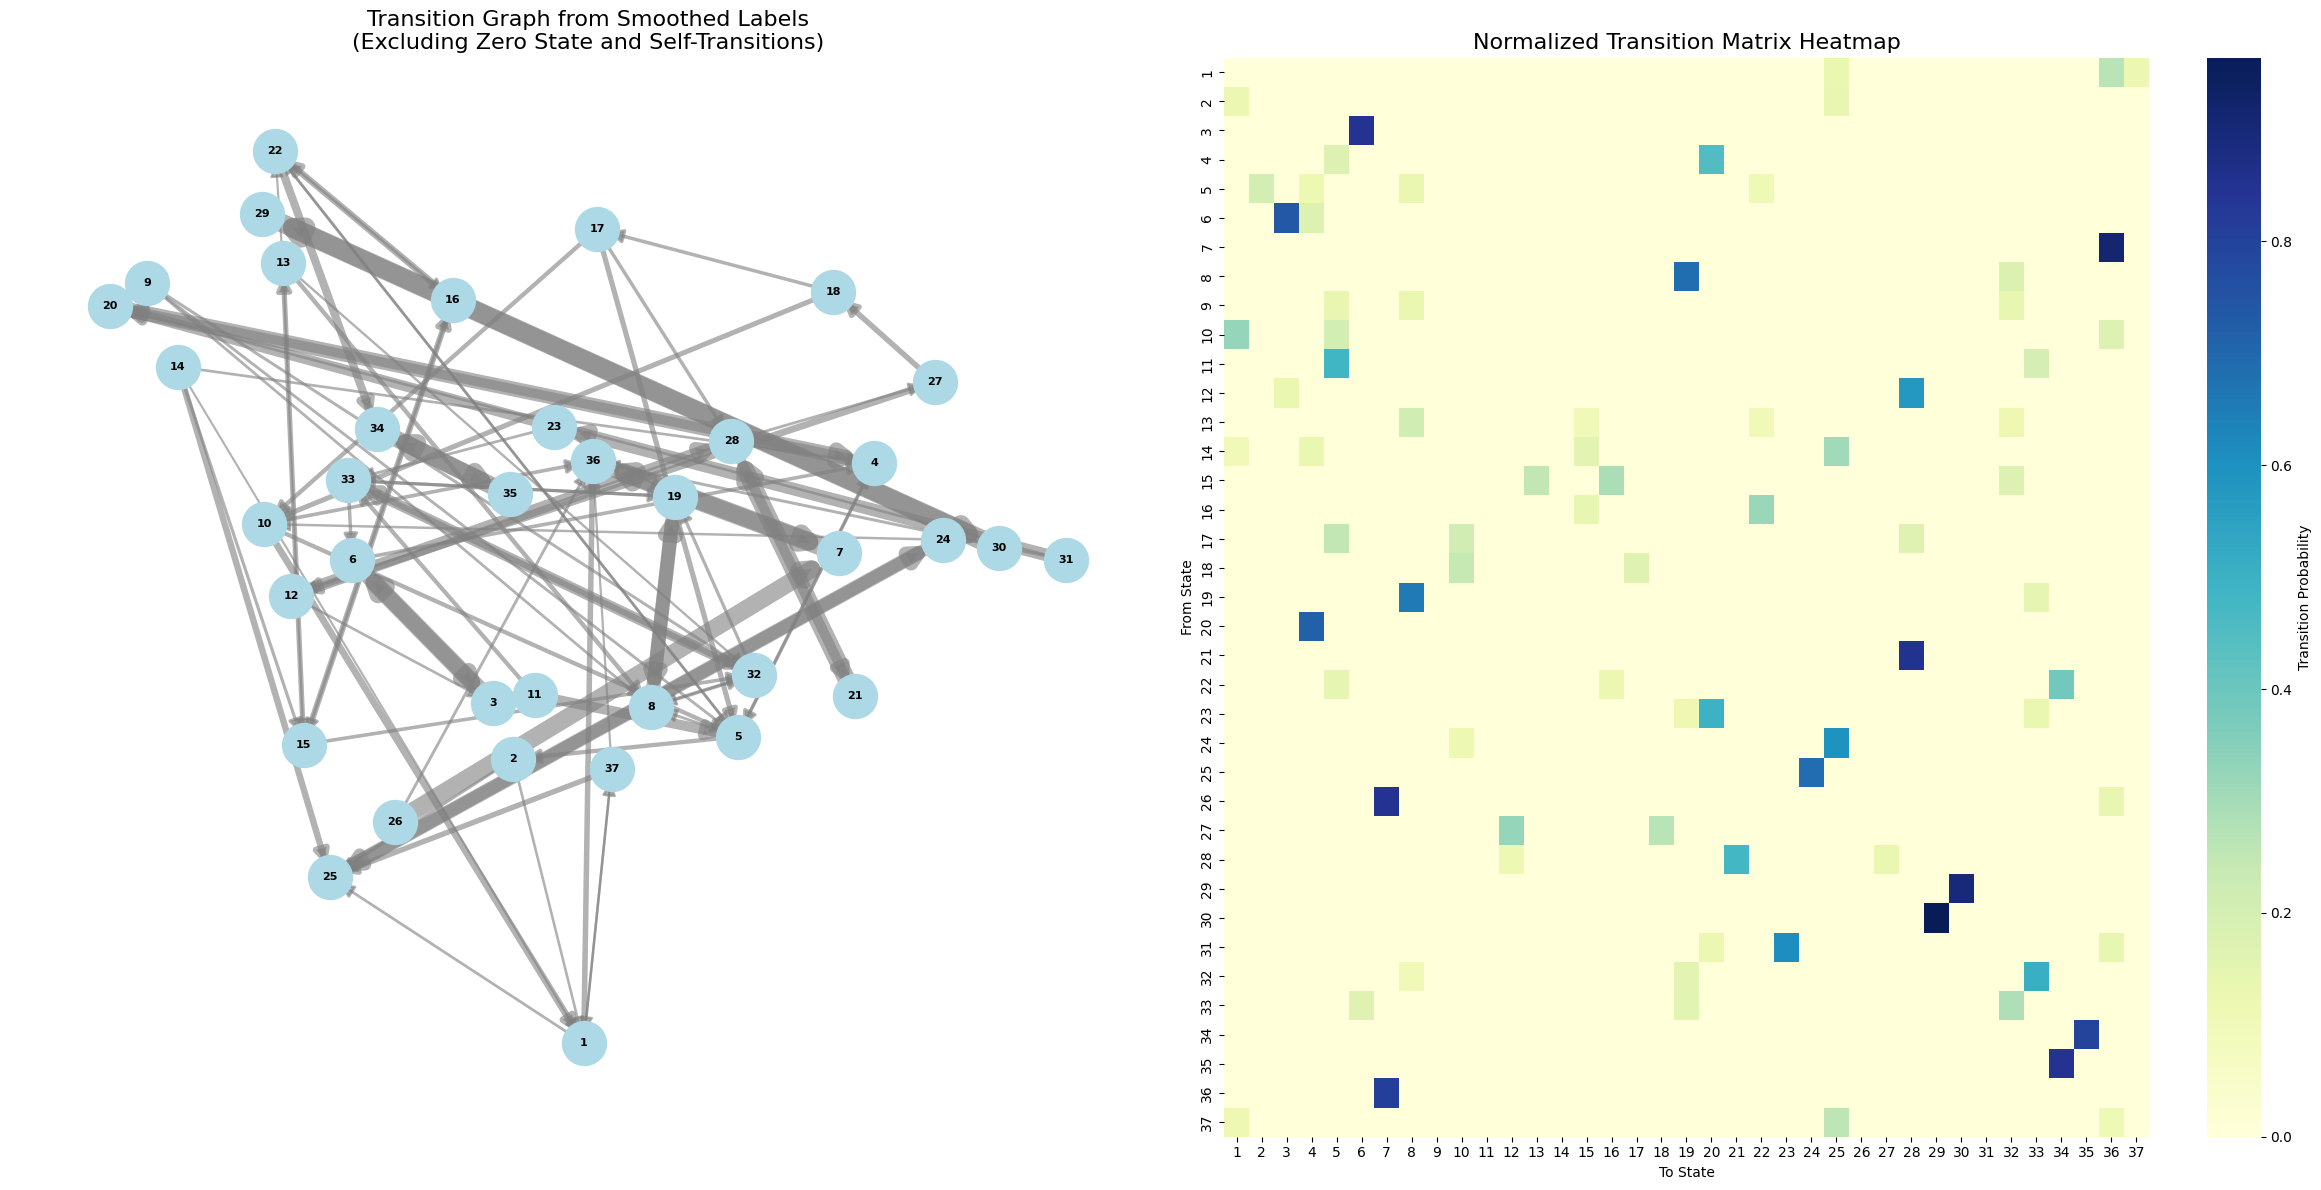

Number of unique labels (excluding zero state): 37

Top 5 most common transitions (excluding zero state and self-transitions):
From 7 to 36: 1482 times
From 36 to 7: 1475 times
From 8 to 19: 896 times
From 19 to 8: 798 times
From 6 to 3: 646 times

Transition matrix (excluding zero state and self-transitions):
[[ 0. 31.  0. ...  0. 85. 40.]
 [30.  0.  2. ...  1. 18. 12.]
 [ 2.  0.  0. ...  7.  0.  0.]
 ...
 [ 0.  0.  1. ...  0.  0.  1.]
 [96.  0.  0. ...  0.  0. 10.]
 [18.  2.  3. ...  0. 17.  0.]]

Normalized transition matrix (excluding zero state and self-transitions):
[[0.         0.         0.         ... 0.         0.26479751 0.12461059]
 [0.12658228 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.11320755 0.         0.         ... 0.         0

In [270]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter
import seaborn as sns

# Assuming smoothed_labels is already defined from the previous script
# If not, you need to load and process it first

# Remove state 0 from unique labels
unique_labels = np.unique(smoothed_labels)
unique_labels = unique_labels[unique_labels != 0]
n_labels = len(unique_labels)

# Build transition matrix
transition_matrix = np.zeros((n_labels, n_labels))

for i in range(len(smoothed_labels) - 1):
    if smoothed_labels[i] != 0 and smoothed_labels[i+1] != 0:
        from_state = np.where(unique_labels == smoothed_labels[i])[0][0]
        to_state = np.where(unique_labels == smoothed_labels[i+1])[0][0]
        if from_state != to_state:  # Exclude self-transitions
            transition_matrix[from_state, to_state] += 1

# Normalize transition matrix
row_sums = transition_matrix.sum(axis=1)
row_sums[row_sums == 0] = 1  # Avoid division by zero
transition_matrix_norm = transition_matrix / row_sums[:, np.newaxis]
transition_matrix_norm[transition_matrix_norm < 0.1] = 0

# Create graph
G = nx.DiGraph()

# Add nodes
for label in unique_labels:
    G.add_node(label)

# Add edges (excluding self-edges)
for i, from_label in enumerate(unique_labels):
    for j, to_label in enumerate(unique_labels):
        if i != j:  # Exclude self-edges
            weight = transition_matrix_norm[i, j]
            if weight > 0:
                G.add_edge(from_label, to_label, weight=weight)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))

# Plot graph
#pos = nx.spring_layout(G, k=0.2, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue', ax=ax1)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold', ax=ax1)
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
nx.draw_networkx_edges(G, pos, width=[w * 15 for w in weights], edge_color='gray',
                       arrows=True, arrowsize=20, alpha=0.6, ax=ax1)
ax1.set_title("Transition Graph from Smoothed Labels\n(Excluding Zero State and Self-Transitions)", fontsize=16)
ax1.axis('off')

# Plot transition matrix as heatmap without numbers
sns.heatmap(transition_matrix_norm, cmap='YlGnBu', ax=ax2, cbar_kws={'label': 'Transition Probability'})
ax2.set_title("Normalized Transition Matrix Heatmap", fontsize=16)
ax2.set_xlabel("To State")
ax2.set_ylabel("From State")
ax2.set_xticklabels(unique_labels)
ax2.set_yticklabels(unique_labels)

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Number of unique labels (excluding zero state): {n_labels}")
print("\nTop 5 most common transitions (excluding zero state and self-transitions):")
transitions = [(smoothed_labels[i], smoothed_labels[i+1]) for i in range(len(smoothed_labels)-1)
               if smoothed_labels[i] != 0 and smoothed_labels[i+1] != 0 and smoothed_labels[i] != smoothed_labels[i+1]]
for transition, count in Counter(transitions).most_common(5):
    print(f"From {transition[0]} to {transition[1]}: {count} times")

print("\nTransition matrix (excluding zero state and self-transitions):")
print(transition_matrix)

print("\nNormalized transition matrix (excluding zero state and self-transitions):")
print(transition_matrix_norm)

# Calculate and print the percentage of data points that were zero
zero_percentage = (smoothed_labels == 0).mean() * 100
print(f"\nPercentage of data points classified as zero: {zero_percentage:.2f}%")

In [ ]:

import networkx as nx
from collections import Counter
import seaborn as sns



# Create graph
G = nx.DiGraph()

# Add nodes
for label in unique_labels:
    G.add_node(label)

# Add edges (excluding self-edges)
for i, from_label in enumerate(unique_labels):
    for j, to_label in enumerate(unique_labels):
        if i != j:  # Exclude self-edges
            weight = transition_matrix_norm[i, j]
            if weight > 0:
                G.add_edge(from_label, to_label, weight=weight)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))

# Improve graph layout
pos = nx.spring_layout(G, k=0.01, iterations=50)
# Alternatively, try other layouts:
pos = nx.circular_layout(G)
#pos = nx.shell_layout(G)
#pos = nx.kamada_kawai_layout(G)

# Adjust node sizes based on their degree
node_sizes = [300 * (1 + G.degree(node)) for node in G.nodes()]

# Adjust edge widths based on their weight
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
max_weight = max(edge_weights)
normalized_weights = [w / max_weight for w in edge_weights]

# Use a colormap for edges
edge_colors = plt.cm.YlOrRd(normalized_weights)

# Plot graph with improved styling
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue', ax=ax1)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold', ax=ax1)
nx.draw_networkx_edges(G, pos, width=[w * 3 for w in normalized_weights], 
                       edge_color=edge_colors, arrows=True, 
                       arrowsize=20, ax=ax1, connectionstyle="arc3,rad=0.1")

# Add a colorbar for edge weights
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd, norm=plt.Normalize(vmin=0, vmax=max_weight))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax1, label='Transition Probability')

ax1.set_title("Improved Transition Graph from HDBSCAN Labels\n(Excluding Noise State, Self-Transitions, and Transitions < 0.1)", fontsize=16)
ax1.axis('off')

# Plot transition matrix as heatmap without numbers
sns.heatmap(transition_matrix_norm, cmap='YlGnBu', ax=ax2, cbar_kws={'label': 'Transition Probability'})
ax2.set_title("Normalized Transition Matrix Heatmap\n(Transitions < 0.1 set to zero)", fontsize=16)
ax2.set_xlabel("To State")
ax2.set_ylabel("From State")
ax2.set_xticklabels(unique_labels)
ax2.set_yticklabels(unique_labels)

plt.tight_layout()
plt.show()



In [ ]:
pos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming smoothed_labels is already defined
# If not, uncomment the following lines to load the data:
# data = np.load('smoothed_labels.npz')
# smoothed_labels = data['smoothed_labels']

# Calculate switching times
switching_times = []
current_state = smoothed_labels[0]
current_duration = 1

for label in smoothed_labels[1:]:
    if label == current_state:
        current_duration += 1
    else:
        if current_state != 0 and current_duration < 1000:
            switching_times.append(current_duration)
        current_state = label
        current_duration = 1

# Add the last state duration if it hasn't switched at the end
if current_state != 0 and current_duration < 1000:
    switching_times.append(current_duration)

# Convert to numpy array for easier manipulation
switching_times = np.array(switching_times)

# Calculate statistics
mean_time = np.mean(switching_times)
median_time = np.median(switching_times)
max_time = np.max(switching_times)
min_time = np.min(switching_times)
std_time = np.std(switching_times)

# Create the histogram
plt.figure(figsize=(14, 8))

# Use 50 bins for times less than 1000
bins = np.linspace(0, 100, 501)
counts, bins, _ = plt.hist(switching_times, bins=bins, edgecolor='black', alpha=0.7)

plt.title('Histogram of State Switching Times (Excluding State 0, Times < 1000)', fontsize=16)
plt.xlabel('Duration (number of time steps)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add vertical lines for mean and median
plt.axvline(mean_time, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_time:.2f}')
plt.axvline(median_time, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_time:.2f}')

plt.legend(fontsize=10)

# Add text box with statistics
stats_text = f'Mean: {mean_time:.2f}\nMedian: {median_time:.2f}\nMax: {max_time}\nMin: {min_time}\nStd Dev: {std_time:.2f}'
plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, verticalalignment='top',
         horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), fontsize=10)

plt.tight_layout()
plt.savefig('switching_times_histogram_filtered.png', dpi=300)
plt.show()

print(f"Mean switching time: {mean_time:.2f}")
print(f"Median switching time: {median_time:.2f}")
print(f"Maximum switching time: {max_time}")
print(f"Minimum switching time: {min_time}")
print(f"Standard deviation of switching times: {std_time:.2f}")
print(f"Total number of switches (excluding state 0 and times >= 1000): {len(switching_times)}")